Number of lines in CSV: (8036, 7)
Min Steering Angle:-0.9426954
Max Steering Angle:1.0


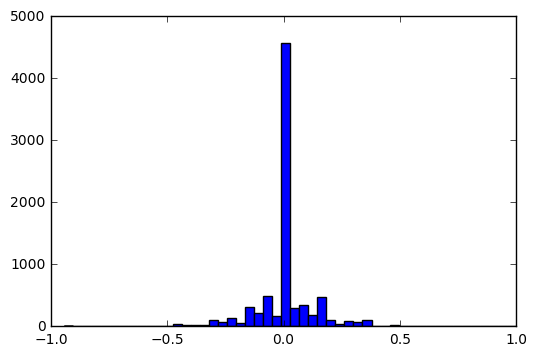

In [2]:
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
import pandas as pd

path = '/data1/udacity/simulator/data'
img_path = path +'/IMG'
csv_file = path +'/driving_log.csv'

csv_array=pd.read_csv(csv_file)

print("Number of lines in CSV: " + str(csv_array.shape))

import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(csv_array.steering, bins=50)
print("Min Steering Angle:" + str(min(csv_array.steering)))
print("Max Steering Angle:" + str(max(csv_array.steering)))

/home/alans/anaconda2/envs/cancer_tutorial_tf/lib/python2.7/site-packages/ipykernel/__main__.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


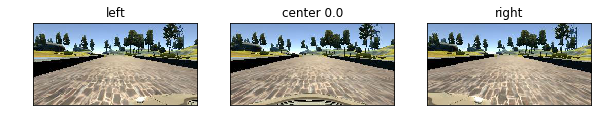

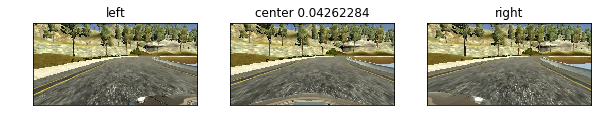

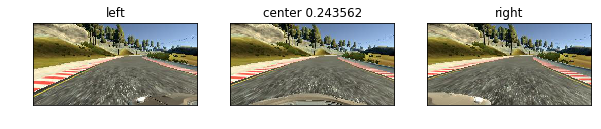

In [2]:
# center, left, right, steering angle, throttle, break, speed

# preprocess the data

X_full_name = []
y_full_angle= []

line = csv_array.iloc[0]
  #print(line)

    
def plotCameraImages(line):
  fig, axes = plt.subplots(1, 3)
  fig.set_figwidth(10)
  fig.set_figheight(20)

  i=0
  for camera in ['left','center','right']:
    #print(i)
    axes.flat[i].imshow(Image.open(path+'/'+line[camera].decode('UTF-8').strip()))
    axes.flat[i].tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    if (camera=='center'):
       axes.flat[i].set_title(camera+' ' +str(line['steering']))
    else:
       axes.flat[i].set_title(camera)
        
    i=i+1
    
plotCameraImages(csv_array.iloc[0])
plotCameraImages(csv_array.iloc[1900])
plotCameraImages(csv_array[csv_array.steering < 0.26 ][csv_array.steering>0.24].iloc[4])
    


In [3]:
csv_array.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


Load our data and plot out some images to see how they are transformed, make sure code works correctly

    Test: 
      loadTraining  
      processImage

(160, 320, 3)
(66, 200, 3)
(66, 200, 3)


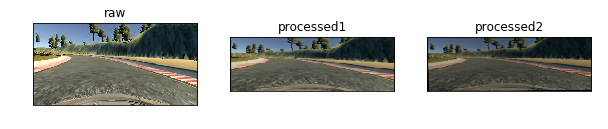

(160, 320, 3)
(66, 200, 3)
(66, 200, 3)


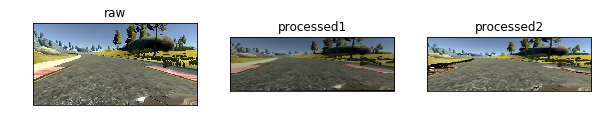

(160, 320, 3)
(66, 200, 3)
(66, 200, 3)


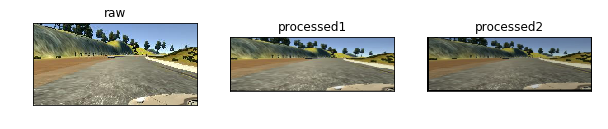

(160, 320, 3)
(66, 200, 3)
(66, 200, 3)


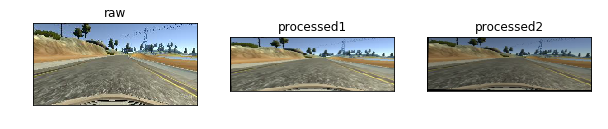

In [4]:
import data
import cv2


xs,ys = data.loadTraining()

def displayRowOfImages(filename):
    img=[]
    img.append( np.array(Image.open(filename)))
    img.append(data.processImage(filename))
    img.append( data.processImage(filename) )


    fig, axes = plt.subplots(1, 3)
    fig.set_figwidth(10)
    fig.set_figheight(20)

    i=0
    for camera in ['raw','processed1','processed2']:
        print(img[i].shape)
        axes.flat[i].imshow(img[i])
        axes.flat[i].tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
        axes.flat[i].set_title(camera)
        i=i+1
    plt.show()
    
displayRowOfImages(xs[0])
displayRowOfImages(xs[1])
displayRowOfImages(xs[2])
displayRowOfImages(xs[3])


    Test 
       augment_brightness_camera_images

original


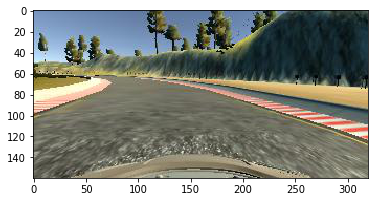

brightness


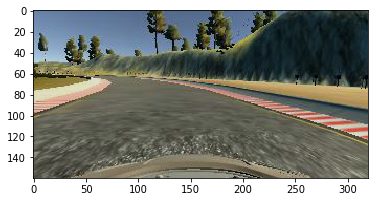

brightness


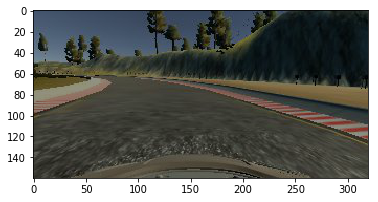

In [5]:
print('original')
filename=xs[0]
img3 = np.array(Image.open(filename))
plt.imshow(img3)
plt.show()
print('brightness')
filename=xs[0]
img3 = np.array(Image.open(filename))
img3 = data.augment_brightness_camera_images(img3)
plt.imshow(img3)
plt.show()
print('brightness')
img3 = np.array(Image.open(filename))
img3 = data.augment_brightness_camera_images(img3)
plt.imshow(img3)
plt.show()

    Test
             cropImage

original


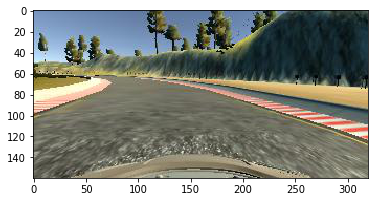

crop


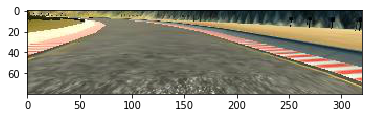

In [6]:
print('original')
filename=xs[0]
img3 = np.array(Image.open(filename))
plt.imshow(img3)
plt.show()
print('crop')
filename=xs[0]
img3 = np.array(Image.open(filename))
img3 = data.cropImage(img3)
plt.imshow(img3)
plt.show()

    test
        rotateAndScaleImage

original


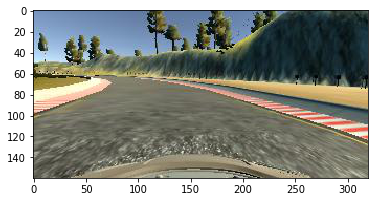

rotateAndScale


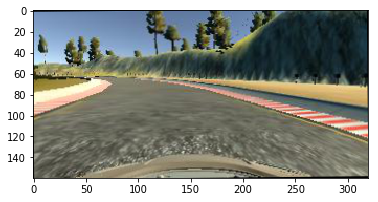

In [7]:
print('original')
filename=xs[0]
img3 = np.array(Image.open(filename))
plt.imshow(img3)
plt.show()
print('rotateAndScale')
filename=xs[0]
img3 = np.array(Image.open(filename))
img3 = data.rotateAndScaleImage(img3)
plt.imshow(img3)
plt.show()

     test
            translateImage

original


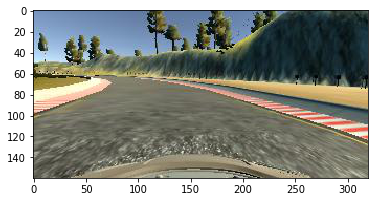

translateImage


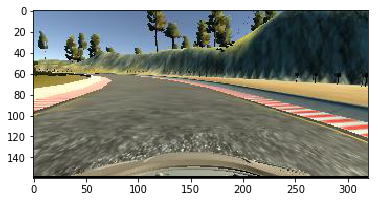

In [8]:
print('original')
filename=xs[0]
img3 = np.array(Image.open(filename))
plt.imshow(img3)
plt.show()
print('translateImage')
filename=xs[0]
img3 = np.array(Image.open(filename))
img3 = data.translateImage(img3)
plt.imshow(img3)
plt.show()

original distribution


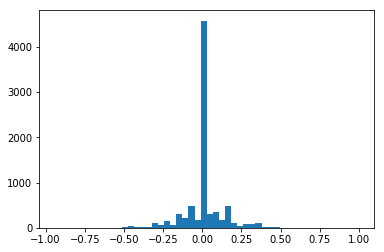

new distribution


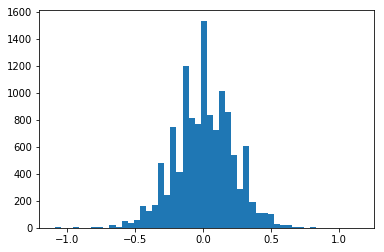

overlay


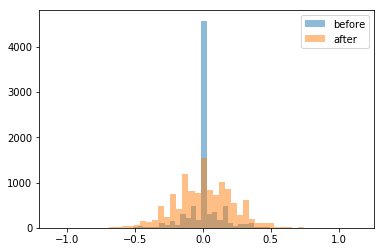

In [14]:
print("original distribution")
plt.hist(csv_array.steering, bins=50)
plt.show()
print("new distribution")
out=plt.hist(ys, bins=50)
plt.show()
print("overlay")
bins = 50
plt.hist(csv_array.steering, bins, alpha=0.5, label='before')
plt.hist(ys, bins, alpha=0.5, label='after')
plt.legend(loc='upper right')
plt.show()

{'val_loss': [0.020946646403802283, 0.018848041648049714, 0.018590620811802048, 0.018876553986701943, 0.017411718658637634], 'loss': [0.032158342078328135, 0.021887443419545891, 0.019845298891887068, 0.019559262469410896, 0.018751338077709078]}


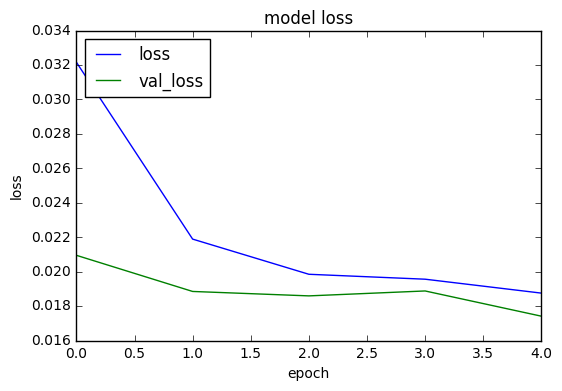

In [4]:
import pickle

history = pickle.load(open("history.p","rb"))
print(history)
#http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()
